<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Time_Series_%26_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**

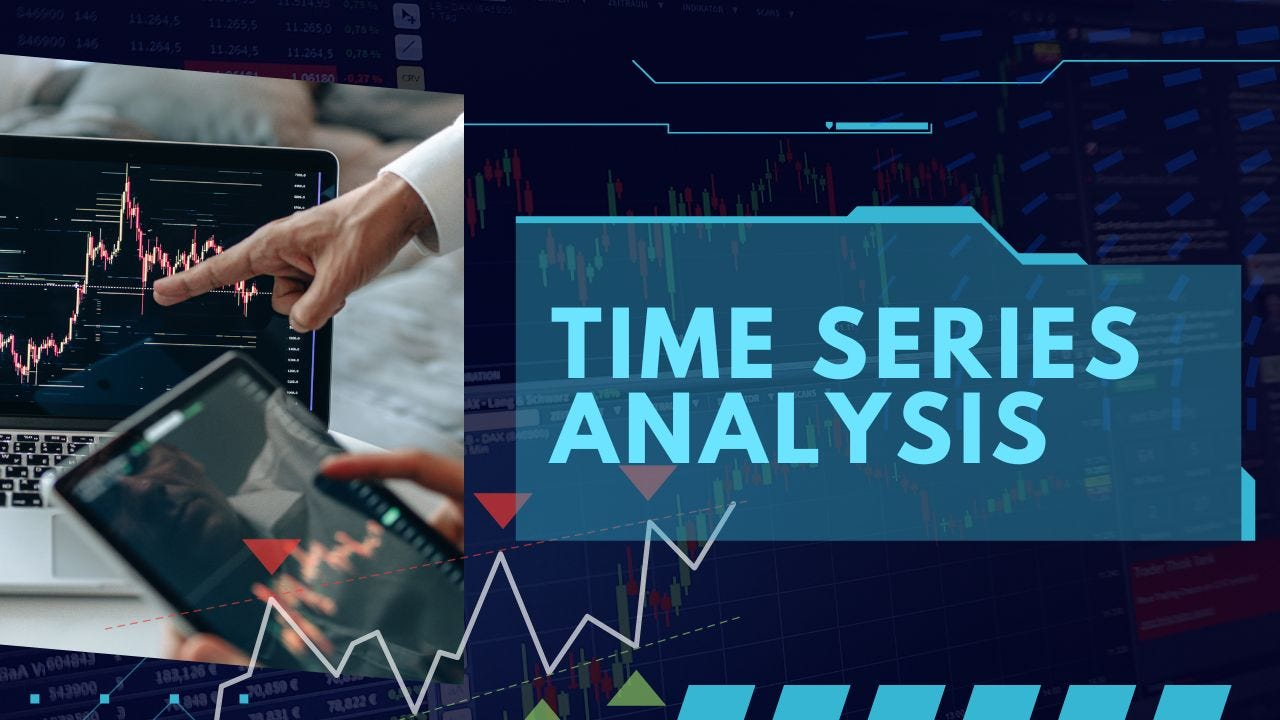

In [23]:
#Load Library
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas.plotting as autocorrelation_plot
import pandas.plotting as plot_autocorrelation
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [4]:
date=datetime.now()
print(date)

2024-12-06 15:15:38.540901


In [8]:
#date difference
date_diff=date-timedelta(days=10)
print(date_diff)

2024-11-26 15:15:38.540901


In [10]:
print(f'{date.day} , {date.month} , {date.year}')

6 , 12 , 2024


In [14]:
from google.colab import files
uploaded = files.upload()

Saving shampoo_sales.csv to shampoo_sales.csv


In [15]:
df=pd.read_csv('shampoo_sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


Text(0, 0.5, 'Sales')

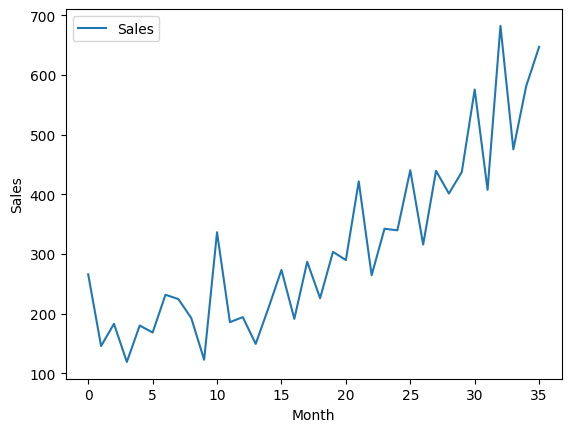

In [21]:
df.plot()
plt.xlabel('Month')
plt.ylabel('Sales')


In [30]:
#plot autocorrelation
df['Sales'].autocorr()


0.7194822398024306

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

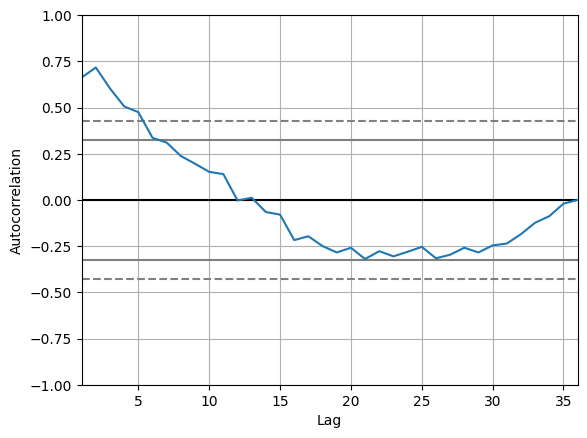

In [32]:
pd.plotting.autocorrelation_plot(df['Sales'])

In [35]:
# Fit the model
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df['Sales'], order=(2, 1, 4), seasonal_order=(0, 1, 1, 12))
res = mod.fit(disp=False)
print(res.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   36
Model:             SARIMAX(2, 1, 4)x(0, 1, [1], 12)   Log Likelihood                -133.893
Date:                              Fri, 06 Dec 2024   AIC                            283.786
Time:                                      16:00:15   BIC                            292.870
Sample:                                           0   HQIC                           286.071
                                               - 36                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3681      0.996     -1.374      0.170      -3.320       0.584
ar.L2         -0.68

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# **Stock Price Analysis**

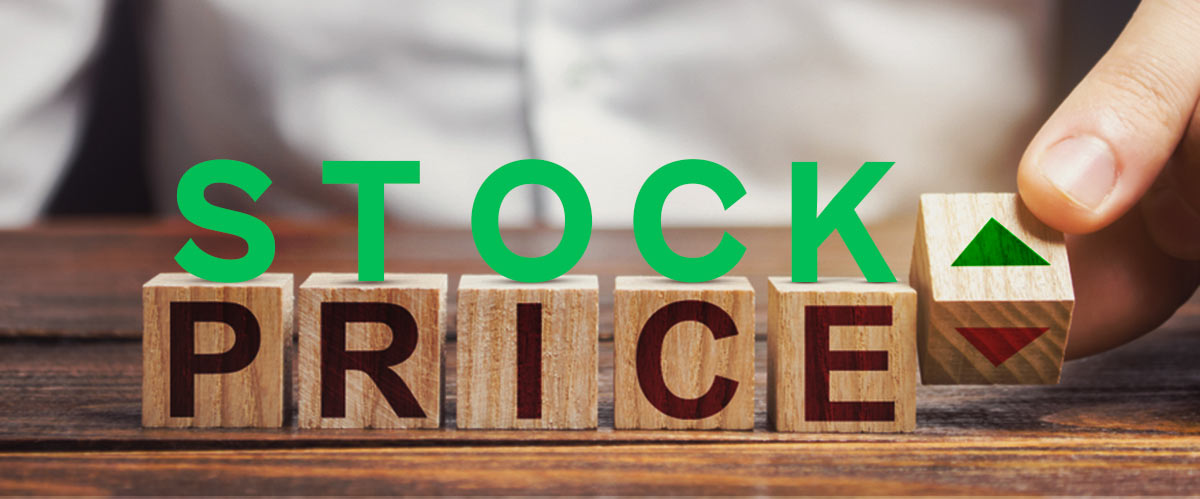

https://finance.yahoo.com/quote/AAPL/

In [39]:
#load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


In [40]:
#load live data Apple Inc. (AAPL)
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
apple_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-06 00:00:00-05:00,193.502037,193.810523,191.173448,191.382431,41089700,0.0,0.0
2023-12-07 00:00:00-05:00,192.686042,194.049359,192.646229,193.322922,47477700,0.0,0.0
2023-12-08 00:00:00-05:00,193.253242,195.034524,192.725827,194.755890,53377300,0.0,0.0
2023-12-11 00:00:00-05:00,192.168554,192.546706,190.486791,192.238205,60943700,0.0,0.0
2023-12-12 00:00:00-05:00,192.138714,193.770718,190.785344,193.760773,52696900,0.0,0.0


In [41]:
stockdata=yf.download('AAPL',start='2020-01-01',end='2023-01-01')
stockdata.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.796036,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088310,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662697,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320976,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484352,75.797501,76.110001,74.290001,74.290001,132079200


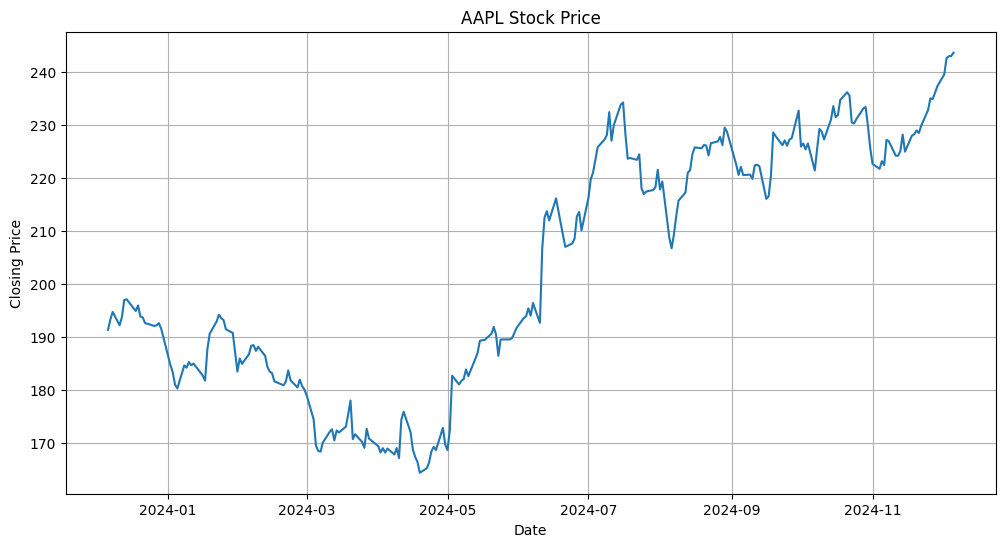

In [42]:
# prompt: visualise the appl stock

# Plot the closing price of AAPL
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Close'])
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()